Student Name: Fergus Mc Hale
Student ID: 18203485

- TODO
- Comments
- Refactoring
- Graphs

- References
- https://stackoverflow.com/questions/36771525/python-pca-projection-into-lower-dimensional-space
- http://nasseralkmim.github.io/notes/2017/03/20/linear-algebra-change-of-basis-explained-using-python/
- http://people.cs.pitt.edu/~iyad/PCA.pdf
- http://people.duke.edu/~ccc14/sta-663-2016/09_PCA.html#Change-of-basis-via-PCA
- https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb
- https://plot.ly/ipython-notebooks/principal-component-analysis/
- https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python
- https://github.com/echen/principal-components-analysis/blob/master/pca.py
- https://medium.com/district-data-labs/principal-component-analysis-with-python-4962cd026465
- https://alyssaq.github.io/2015/understanding-eigenvectors-and-eigenvalues-visually/
- https://community.esri.com/blogs/dan_patterson/2014/11/29/using-numpy-linalg-to-replicate-matrix-operations-reinventing-the-wheel
- https://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn
- https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained

- Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

- Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
- Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
- Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
- Store those results from your fit method that are required to transform the data set, in suitable class properties.
- Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
 

- N.B.:

- Limit your code to the aspects explicitly listed. 
- Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
- The required modules have already been imported for you. You should not import any other modules.
- If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later. 
 

- HINTS:

- Numpy.mean() will 'flatten' your tensor by default. To obtain the mean along a given axis, you may use the axis parameter.

- Numpy.cov() assumes by default that data is presented with one observation per column. This can be changed using the rowvar parameter. 

- A Numpy.matrix is a convenient way of performing the matrix operations required for PCA whilst retaining a matrix/vector like structure. Use of this class is discouraged, but would form a good starting point for tackling this week's challenge. Once you have the code working with the matrix class, changing to arrays is relatively straight forward.

- You can use Scikitlearn as follows to check the Eigen vectors that you have found with your 'fit' mehod:

- pca = PCA(n_components=2)
- pca.fit(data)
- print(pca.components_)

- You can use Scikitlearn to obtain 
- GIT push your implementation and post your manual calculations to E-tivity 5: Linear Algebra in Numpy and Beyond and provide the name of your branch.

- Respond (Complete by Wednesday Week 6)

- Respond to a post of one of your peers with a respectful and in-depth assessment of the implementation with a view to pointing out potential improvements or sound alternative solutions.

- Reflect (Complete by Saturday Week 6)

- With your code (containing any corrections you have made based on your peers’ feedback), do the following:

- For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot.
 - For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction
 
- HINTS:

- You can use Scitkitlean as follows to calculate the new values of the data points in the original dataset when you reduce the dimensions of the data (from 2) to 1: 
- pca = PCA(n_components=1)
- pca.fit(data)
- data_pca = pca.transform(data)
- data_reduced = pca.inverse_transform(data_pca)

- You can use plots to compare the values in your original dataset with the dataset with reduced dimensionality:
- plt.plot(data[:,0], data[:,1], 'or')
- plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
 - plt.show()

- You can use your own PCA results to calculate the new values of the data points int the original dataset when you reduce the dimensions of the data (from 2) to 1:
- reduced = np.dot(features[:,0],red_highvar.T)+mean.T

- with:

- reduced: a 2x20 matrix of the new values of the dataset with dimensionality reduction applied
- features[:,0]: the 2x1 matrix (or column vector) which contains the Eigen vector associated with the highest variance
- red_highvar: a 20x1 matrix containing the reduced dataset which is the output of your transform method with n_components set to 1. 
- mean: a 1x2 matrix of the per-column mean values of your original data
- T: the transform operator as provided by Numpy

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module
- As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. 
- Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.
- The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.
- data.shape

2. Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed

- Original Data Graphed

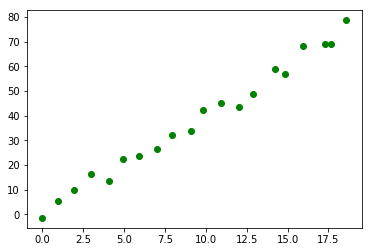

In [45]:
import matplotlib.pyplot as plt
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
plt.plot(data[:, 0], data[:, 1], 'go')

- Scikit Learn n_components = 1

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import random as rand
import matplotlib.pyplot as plt

a_x = 0.05
a_y= 10
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

pca = PCA(n_components=1)
pca_fit = pca.fit(data)
print(pca_fit)
data_pca = pca.transform(data)
print(data_pca)
data_reduced = pca.inverse_transform(data_pca)
print(data_reduced)

plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-37.30285291]
 [-35.4401548 ]
 [-28.1350853 ]
 [-22.6702613 ]
 [-23.08569771]
 [-21.58005969]
 [-16.94998136]
 [-13.13608559]
 [ -6.28730449]
 [ -0.60984166]
 [  2.84815343]
 [  3.81564876]
 [  8.6346103 ]
 [ 15.33705871]
 [ 19.06569631]
 [ 20.83423711]
 [ 25.54964412]
 [ 33.45240016]
 [ 38.36947719]
 [ 37.29039872]]
[[ 0.46317982  1.28025796]
 [ 0.91539605  3.08722912]
 [ 2.68888311 10.17375041]
 [ 4.01560487 15.47508144]
 [ 3.91474736 15.07207378]
 [ 4.28027839 16.53266713]
 [ 5.4043449  21.02422585]
 [ 6.33026283 24.72402003]
 [ 7.99297455 31.36790386]
 [ 9.37131966 36.87551213]
 [10.21083386 40.23005322]
 [10.44571738 41.16860367]
 [11.61563999 45.84339473]
 [13.24282581 52.34532375]
 [14.1480452  55.96241046]
 [14.5774024  57.67804122]
 [15.72218458 62.25237583]
 [17.64077489 69.91870247]
 [18.83451747 74.68867367]
 [18.57254437 73.64187835]]


<Figure size 640x480 with 1 Axes>

In [ ]:
- Scikit learn N_Components = 2

[[ 41.31264433   0.80015661]
 [ 34.73090535   0.11017547]
 [ 27.71453359  -0.68264269]
 [ 25.65227967  -0.12223533]
 [ 20.42037727  -0.38266191]
 [ 15.53414583  -0.78739574]
 [ 15.69080796   0.30660507]
 [  8.89872696  -0.39907169]
 [  3.78019397  -0.54053592]
 [  6.30924428   0.92634133]
 [ -4.4418096   -0.55772707]
 [ -1.16202422   1.32095868]
 [-11.75319543  -0.35839994]
 [-17.13979892  -0.67733326]
 [-17.41644737   0.32919107]
 [-21.43198088   0.20405724]
 [-23.74310992   0.76839357]
 [-29.11553902   0.44614058]
 [-35.81608084  -0.92247716]
 [-38.023873     0.21846109]]
[[ 1.77635684e-15 -7.69213707e-01]
 [ 9.84268470e-01  5.77498812e+00]
 [ 1.97809475e+00  1.27657208e+01]
 [ 3.03822863e+00  1.46212702e+01]
 [ 4.09946009e+00  1.97510278e+01]
 [ 4.93423398e+00  2.45824064e+01]
 [ 5.95388101e+00  2.41561427e+01]
 [ 6.97575677e+00  3.09078917e+01]
 [ 8.12368344e+00  3.58980476e+01]
 [ 8.90874772e+00  3.30817560e+01]
 [ 1.01709417e+01  4.38611106e+01]
 [ 1.11661785e+01  4.02147485e+01]

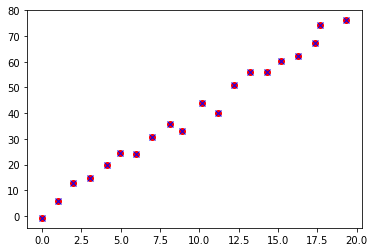

In [43]:
from sklearn.decomposition import PCA
import numpy as np
import random as rand

a_x = 0.05
a_y= 10

pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
print(data_pca)
data_reduced = pca.inverse_transform(data_pca)
print(data_reduced)

plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

 - PCA Implementation

PCA Implementation
Fit
[[0.24516767]
 [0.96948069]]
Transform
[[-34.66018357]
 [-35.04685526]
 [-30.33142609]
 [-23.39711238]
 [-24.8641837 ]
 [-22.04887803]
 [-14.91437783]
 [ -6.7924257 ]
 [ -5.8235469 ]
 [ -6.05126306]
 [  3.33549798]
 [  2.51656144]
 [  6.33072024]
 [ 19.43832725]
 [ 23.65532597]
 [ 25.19329473]
 [ 24.03223383]
 [ 26.8543547 ]
 [ 33.0621391 ]
 [ 39.5117973 ]]


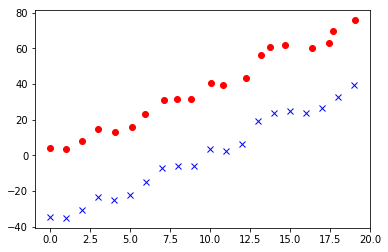

Scikitlean
Fit
[[0.24516767 0.96948069]]
Transform
[[-34.66018357]
 [-35.04685526]
 [-30.33142609]
 [-23.39711238]
 [-24.8641837 ]
 [-22.04887803]
 [-14.91437783]
 [ -6.7924257 ]
 [ -5.8235469 ]
 [ -6.05126306]
 [  3.33549798]
 [  2.51656144]
 [  6.33072024]
 [ 19.43832725]
 [ 23.65532597]
 [ 25.19329473]
 [ 24.03223383]
 [ 26.8543547 ]
 [ 33.0621391 ]
 [ 39.5117973 ]]


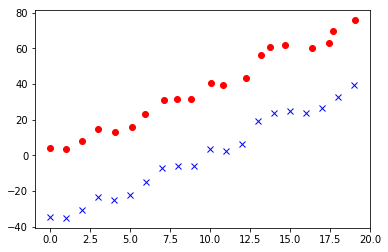

In [8]:
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import linalg as nla
import random as rand
import matplotlib.pyplot as plt

a_x = 0.05
a_y= 10
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])


class pca:
    
    def __init__(self,n_components=None):
        self.n_components = n_components
        self.components_ = []
        
    def fit(self, data):
        """Given an array finds the eigenvalues and eigenvectors
            Args:
            data (array) The dataset that has been supplied
            Returns: eigenvectors, eigenvalues (tuple) The result of the operation performed on the dataset
            """
        row, columns = data.shape 
        self.data = data
        self.mean_matrix_zero = data.mean(0)
        self.covariance_matrix_zero = np.cov(data - self.mean_matrix_zero, rowvar=False)
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(self.covariance_matrix_zero)
        # sort eigenvectors and value
        index = self.eigenvalues.argsort()[::-1]   
        eigenValues = self.eigenvalues[index]
        eigenVectors = self.eigenvectors[:,index]
        # restrict based on n components
        self.eigen_vectors = eigenVectors[:, :self.n_components]
        # set components based on eigenvectors
        self.components_ = self.eigen_vectors 
        # return tuple of eigenvalues and eigenvectors
        return (eigenValues, eigenVectors)
    
    def transform(self, data):
        """Given data selects an eigenvector returns the transform 
            Args:
            data (array) The dataset that has been supplied
            Returns: transformed result ()
            """
        selected_eigen_vectors = self.eigen_vectors.T[::-1]
        transform_result = np.dot(data - self.mean_matrix_zero, selected_eigen_vectors[:1].T)
        print(transform_result)
        return transform_result
        
    def graph(self, data, transformed_data):
        """Projects a visulzation of data and transformed data 
            Args:
            data (array) Dataset
            transformed_data (array) Dataset
            Returns: None
            """
        plt.plot(data[:,0], data[:,1], 'or')
        plt.plot(transformed_data,'xb')
        plt.show()
                 
print("PCA Implementation")     
implementated_pca = pca(1)
print("Fit")
implementated_pca.fit(data)
print(implementated_pca.components_)
print("Transform")
transformed_data = implementated_pca.transform(data)
implementated_pca.graph(data, transformed_data)

print("Scikitlean")
pca = PCA(1)
print("Fit")
pca.fit(data)
print(pca.components_)
print("Transform")
scikit_learn_transform = pca.transform(data)
print(scikit_learn_transform)
implementated_pca.graph(data, scikit_learn_transform)